# **Objective**
## To explore the relationship between trader performance and market sentiment, uncover hidden patterns, and deliver insights that can drive smarter trading strategies.
---


## **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## **Loading the Datasets**

In [2]:
df_senti = pd.read_csv(r"D:\Internship_Tasks\Trader_Market_Relationship\Datasets\fear_greed_index - fear_greed_index.csv")
df_trader = pd.read_csv(r"D:\Internship_Tasks\Trader_Market_Relationship\Datasets\historical_data - historical_data.csv")

---

### **Merging Sentiment Data with Historical Trader Data** 
- In this step, I aimed to combine the Bitcoin market sentiment dataset with the historical trader dataset so that we could explore the relationship between sentiment and trader performance on a common timeline.
- The challenge was that the sentiment dataset is daily (one entry per date), whereas the trader dataset is intraday (multiple rows per date).
- To resolve this, I kept only the Timestamp IST column (with full datetime information) from the trader dataset as the primary time reference and assigned the same daily sentiment to all trading rows that fall on that date.
- This allows us to overlay sentiment information on the much finer-grained trader activity timeline.

In [4]:
# Ensure datetime types
df_senti['date'] = pd.to_datetime(df_senti['date']).dt.date
df_trader['Timestamp IST'] = pd.to_datetime(
    df_trader['Timestamp IST'], 
    format='%d-%m-%Y %H:%M'
)

# Extract date from trader timestamps
df_trader['date'] = df_trader['Timestamp IST'].dt.date

# Merge on date
df_merged = pd.merge(
    df_trader,
    df_senti[['date', 'classification', 'value']],
    on='date',
    how='left'
)

# Drop helper 'date' if not needed
df = df_merged.drop(columns=['date'])
df = df.sort_values(by="Timestamp IST").reset_index(drop=True)
df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,classification,value
0,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.08240,156.39,BUY,2023-05-01 01:06:00,0.0967,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,1.680000e+12,Greed,63.0
1,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1898.6,0.07220,137.08,BUY,2023-05-01 01:06:00,0.1791,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,1.680000e+12,Greed,63.0
2,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.09670,183.53,BUY,2023-05-01 01:06:00,0.0000,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,1.680000e+12,Greed,63.0
3,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,41866.0,0.58211,24370.62,SELL,2023-12-05 03:11:00,-0.0150,Open Short,0.0,0xd2e598f2a6ca3f77dc7b04065f9e8a0139006b7925f4...,4064974623,True,6.092654,2.830000e+14,1.700000e+12,Extreme Greed,75.0
4,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,41867.0,0.01500,628.00,SELL,2023-12-05 03:11:00,0.0000,Open Short,0.0,0xd2e598f2a6ca3f77dc7b04065f9e8a0139006b7925f4...,4064974623,True,0.157001,1.070000e+15,1.700000e+12,Extreme Greed,75.0


In [14]:
df.tail()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,classification,value
211219,0x8477e447846c758f5a675856001ea72298fd9cb5,WLD,1.0350,159.8,165.39,BUY,2025-05-01 12:10:00,-86277.9,Close Short,-9.93956,0x04aa00b3346e4eb904ab0422968b79020289003beeb1...,90142228106,False,0.016539,7.890000e+14,1.750000e+12,Neutral,53.0
211220,0x8477e447846c758f5a675856001ea72298fd9cb5,WLD,1.0350,11.9,12.32,BUY,2025-05-01 12:10:00,-86289.8,Close Short,-0.74018,0x00000000000000000000000000000000000000000000...,90142228106,False,0.001231,8.360000e+14,1.750000e+12,Neutral,53.0
211221,0x8477e447846c758f5a675856001ea72298fd9cb5,WLD,1.0300,538.8,554.96,BUY,2025-05-01 12:13:00,-85474.1,Close Short,-30.81936,0x79491e1457e1570bbfd5042296931b02021e00098280...,90142168921,False,0.055496,6.280000e+14,1.750000e+12,Neutral,53.0
211222,0x8477e447846c758f5a675856001ea72298fd9cb5,WLD,1.0325,257.9,266.28,BUY,2025-05-01 12:13:00,-86011.6,Close Short,-15.39663,0xe46a94c60849c885801804229693040204a0005228d0...,90142215802,False,0.026628,1.070000e+15,1.750000e+12,Neutral,53.0
211223,0x8477e447846c758f5a675856001ea72298fd9cb5,WLD,1.0325,279.6,288.69,BUY,2025-05-01 12:13:00,-85753.7,Close Short,-16.69212,0x6d9cdb0fd78454175c140422969312020438007206bb...,90142215802,False,0.028868,2.320000e+13,1.750000e+12,Neutral,53.0


---

## **Exploratory Analysis and Visualization**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

### **Insights**
- We can see that there are 6 NaN values in 'classification' and 'value' probably because of the mismatch in the timeline of the two datasets. 
- Whether to drop them or not, we will see about it in the next steps.
---

### **To resolve the NaNs**
- We will first fetch those rows where NaNs are present

In [9]:
df[df['classification'].isna()]

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,classification,value
727,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,EIGEN,2.8330,10000.00,28330.00,BUY,2024-10-26 04:44:00,-32797.51,Close Short,11655.000000,0x4da9426d2bf6ec027d8404152f9bad02010700c745eb...,40671411386,False,2.719680,8.350000e+13,1.730000e+12,NaN,NaN
728,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,EIGEN,2.7110,10797.51,29272.05,BUY,2024-10-26 04:52:00,-22797.51,Close Short,13901.794130,0x66588e180b942ff0e4d104152fb6f20000ac4ae48a39...,40671438761,False,2.810115,3.230000e+14,1.730000e+12,NaN,NaN
729,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,EIGEN,2.5889,6908.33,17884.98,BUY,2024-10-26 04:52:00,-12000.00,Close Short,9737.981968,0x66588e180b942ff0e4d104152fb6f20000ac4ae48a39...,40671466136,False,1.716957,1.070000e+15,1.730000e+12,NaN,NaN
730,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,EIGEN,2.5889,529.39,1370.54,BUY,2024-10-26 04:52:00,-5091.67,Close Short,746.228144,0x66588e180b942ff0e4d104152fb6f20000ac4ae48a39...,40671466136,False,0.131570,8.770000e+14,1.730000e+12,NaN,NaN
731,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,EIGEN,2.5889,38.65,100.06,BUY,2024-10-26 04:52:00,-4562.28,Close Short,54.481040,0x66588e180b942ff0e4d104152fb6f20000ac4ae48a39...,40671466136,False,0.009605,9.820000e+14,1.730000e+12,NaN,NaN
732,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,EIGEN,2.5889,4523.63,11711.23,BUY,2024-10-26 04:53:00,-4523.63,Close Short,6376.508848,0x39ce7efcc1773fd0eec704152fbcb4010100c8beadd4...,40671466136,False,1.124277,9.360000e+14,1.730000e+12,NaN,NaN


### **Insigths**
- We can see that these rows contain the same 'Account', so dropping them might result in losing the information for this particular account incase these are the only rows for this account.
- To check this, we will drop and see whether there is a decrease in the number of unique accounts.
- From the trader dataset analysis, we already know there are 32 unique accounts.
---

In [5]:
df = df.dropna()
print("Unique accounts after dropping NaNs: ", df['Account'].nunique())

Unique accounts after dropping NaNs:  32


### **Insights**
- There is no change in the number of unique accounts, so we are good to go ahead.
---

In [18]:
df['Timestamp IST'] = pd.to_datetime(df['Timestamp IST'], errors='coerce')
print("Min Date:", df['Timestamp IST'].min())
print("Max Date:", df['Timestamp IST'].max())

Min Date: 2023-05-01 01:06:00
Max Date: 2025-05-01 12:13:00


In [19]:
df.isna().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
classification      0
value               0
dtype: int64

In [20]:
print("Shape of the dataset: ", df.shape)

Shape of the dataset:  (211218, 18)


In [22]:
print("Any duplicate rows: ", df.duplicated().any())

Any duplicate rows:  False


---
### **Now our dataset is clean and sorted for further analysis**
---

### **# PnL vs Sentiment**

In [35]:
# Group by classification and calculate statistics
stats_df = df.groupby("classification")["Closed PnL"].agg(
    Min="min",
    Q1=lambda x: x.quantile(0.25),
    Median="median",
    Q3=lambda x: x.quantile(0.75),
    Mean="mean",
    Max="max"
).reset_index()

# Sort by Mean (optional)
stats_df = stats_df.sort_values(by="Mean", ascending=False)

print("Closed PnL Statistics grouped by Market Sentiment:")
stats_df

Closed PnL Statistics grouped by Market Sentiment:


,classification,Min,Q1,Median,Q3,Mean,Max
1,Extreme Greed,-10259.46800,0.0,0.0,10.028709,67.892861,44223.45187
2,Fear,-35681.74723,0.0,0.0,5.590856,54.290400,135329.09010
3,Greed,-117990.10410,0.0,0.0,4.944105,42.743559,74530.52371
0,Extreme Fear,-31036.69194,0.0,0.0,5.635032,34.537862,115287.00000
4,Neutral,-24500.00000,0.0,0.0,3.995795,34.307718,48504.09555


### **Min, Max**
- **Extreme Greed:** Max PnL = 44,223, Min = -10,259 -> relatively smaller downside compared to other sentiments.
- **Greed:** Max PnL = 74,531, Min = -117,990 -> huge volatility; traders can gain a lot but can also lose very heavily.
- **Fear:** Max = 135,329, Min = -35,682 -> very high upside potential, but moderate downside.
- **Extreme Fear:** Max = 115,287, Min = -31,037 -> similar to Fear but slightly lower max and similar downside.
- **Neutral:** Max = 48,504, Min = -24,500 -> moderate range, less extreme moves.
---
### **Quartiles (Q1, Median, Q3)**
- For all sentiments, Q1 and Median are 0, which means at least 50% of trades are breaking even or have very small PnL.
- Q3 is small for all categories (3–10), indicating that only a small fraction of trades achieve significant gains.
- Most trades are small or negligible in PnL, only a few trades contribute heavily to profits or losses.
- Shows a skewed distribution, with a long tail on the positive side (high max values).
---
### **Mean vs Max**
- Mean PnL is much smaller than Max, e.g., Fear: mean ~54, max ~135k.
- Extreme disparity shows rare big wins dominate the upside, not the typical trade.
- Average Closed PnL is positive for all categories, meaning traders profit on average, but the distribution is skewed with large outliers.
---
### **Sentiment vs Risk/Reward**
- Greed: High reward but extremely risky (big losses).
- Fear/Extreme Fear: High reward potential, moderate risk.
- Extreme Greed/Neutral: Safer, smaller reward range.
---
---

### **Data Preprocessing: Log Transformation**
- Data Transformation: Applied log1p transformation to Closed PnL
- Reason: Original PnL values span multiple orders of magnitude 
- log1p = log(1 + x) handles zero values better than standard log transformation
- This reveals the underlying distribution pattern that would be hidden in linear scale

d:\Internship_Tasks\Trader_Market_Relationship\trade_env\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


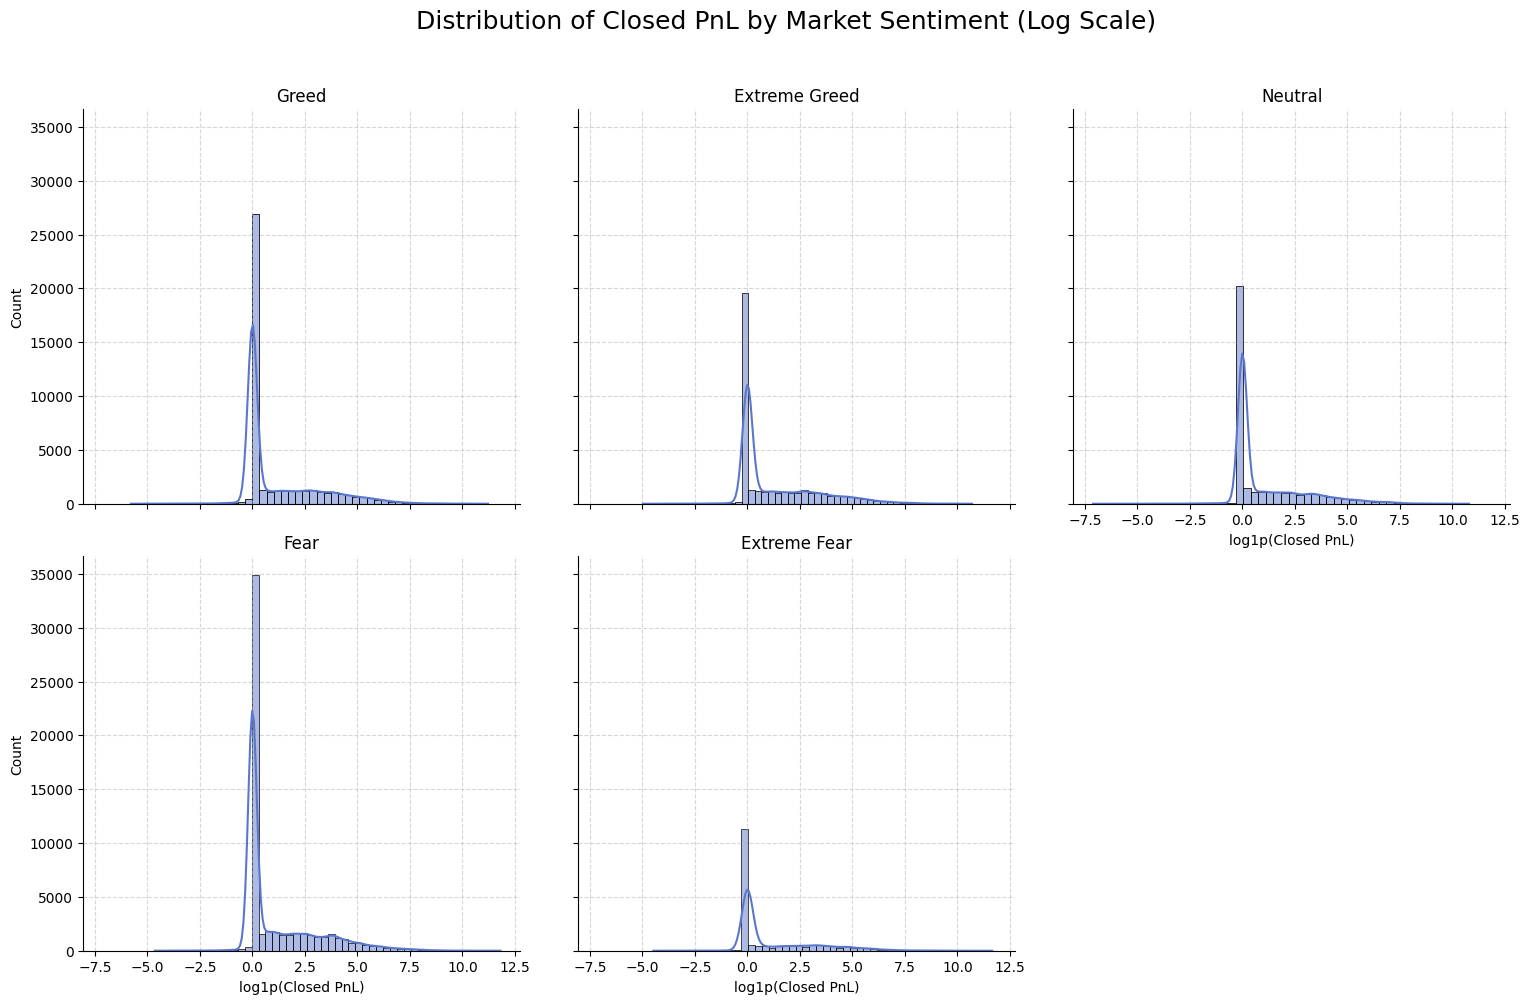

In [53]:
df['ClosedPnL_log'] = np.log1p(df['Closed PnL'])

# Define colors
palette_hist = {
    'Extreme Greed': "#5A77CD",
    'Greed': "#5A77CD",
    'Neutral': "#5A77CD",
    'Fear': "#5A77CD",
    'Extreme Fear': "#5A77CD"
}

# Create FacetGrid
g = sns.FacetGrid(df, col="classification", col_wrap=3, height=5, sharex=True, sharey=True)

# Plot histogram and KDE separately for each sentiment
for ax, sentiment in zip(g.axes.flat, df['classification'].unique()):
    subset = df[df['classification'] == sentiment]
    sns.histplot(subset['ClosedPnL_log'], bins=50, color=palette_hist[sentiment], ax=ax, kde=True)
    ax.set_title(sentiment, fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)

# Axis labels and overall title
g.set_axis_labels("log1p(Closed PnL)", "Count")
plt.subplots_adjust(top=0.88)
g.fig.suptitle("Distribution of Closed PnL by Market Sentiment (Log Scale)", fontsize=18)

plt.show()
plt.show()

| log1p(PnL) | Actual PnL ($) |
|------------|----------------|
| 0.0        | 0              |
| 2.5        | 11             |
| 5.0        | 147            |
| 7.5        | 1,808          |
| 10.0       | 22,025         |
| 12.5       | 268,337        |

### **How to read the chart**
- X-axis (log1p): compressed scale so both small and large PnL trades can be compared.
- Y-axis (Count): how many trades fall in that size bin.
- Histogram bars: actual frequency.
- KDE curve: smoothed probability density estimate.
---
### **Shape**
- Highly right-skewed distributions - Sharp peak near zero with long positive tails
- Similar distribution shapes across all sentiment types
---
### **Interpretation**
- log1p = 0 means actual PnL ≈ $0 - Majority of trades are break-even or small losses/gains
- Heavy right tail - Few trades generate substantial profits (log1p > 5 = $100+ gains)
---
### **Sentiment Link**
- Fear/Extreme Fear - Total trade counts ~ 45K 
- Greed/Extreme Greed - Same total trade volumes ~ 45K
- Neutral - Moderate volume levels
- No clear sentiment advantage - All sentiments show similar PnL distributions
---
### **Key Takeaway**
- Market sentiment affects trading frequency (more trades during fear) but not individual trade profitability - suggesting emotional trading doesn't improve returns, just increases activity volume
---
---


### **# Trade Size vs Sentiment**

In [37]:
# Group by classification and calculate statistics
stats_df = df.groupby("classification")["Size Tokens"].agg(
    Min="min",
    Q1=lambda x: x.quantile(0.25),
    Median="median",
    Q3=lambda x: x.quantile(0.75),
    Mean="mean",
    Max="max"
).reset_index()

# Sort by Mean (optional)
stats_df = stats_df.sort_values(by="Mean", ascending=False)

print("Token Size Statistics grouped by Market Sentiment:")
stats_df

Token Size Statistics grouped by Market Sentiment:


,classification,Min,Q1,Median,Q3,Mean,Max
1,Extreme Greed,1.000000e-05,5.00,42.64,278.0000,8832.415746,11500000.0
3,Greed,1.000000e-05,1.77,30.30,278.0000,4715.327756,15822438.0
4,Neutral,8.100000e-06,2.23,25.02,131.9575,4383.368714,8071225.0
2,Fear,8.740000e-07,2.00,30.01,137.3500,2992.641845,7197337.0
0,Extreme Fear,2.650000e-06,5.00,37.44,179.5300,1675.893319,6623853.0


### **Min, Max**
- **Extreme Greed:** Min = 0.00001, Max = 11,500,000 -> extremely wide range, showing a few massive trades dominate the data.
- **Greed:** Min = 0.00001, Max = 15,822,438 -> also huge, even bigger than Extreme Greed in max.
- **Neutral:** Min = 0.0000081, Max = 8,071,225 -> moderate large trades.
- **Fear:** Min = 0.000000874, Max = 7,197,337 -> small minimum, moderate max.
- **Extreme Fear:** Min = 0.00000265, Max = 6,623,853 → smallest max among all sentiments.
---
### **Quartiles (Q1, Median, Q3)**
- Q1 (25th percentile) is tiny for all categories (1.77–5), showing many very small trades exist.
- Median (50th percentile) ranges from 25–42 -> most trades are relatively small compared to max values.
- Q3 (75th percentile) is consistently around 131–278 -> only a few trades are really large.
- Distribution is highly skewed (small trades dominate, few very large trades)
---
### **Key Takeaway**
- Token sizes are heavily skewed across all sentiments.
- Extreme positive sentiments encourage massive trades, while extreme negative sentiments show lower trading size.
---
---

### **Data Preprocessing: Log Transformation**
- Data Transformation: Applied log1p transformation to Size Tokens
- Reason: Original token values span multiple orders of magnitude (pennies to millions)
- log1p = log(1 + x) handles zero values better than standard log transformation
- This reveals the underlying distribution pattern that would be hidden in linear scale

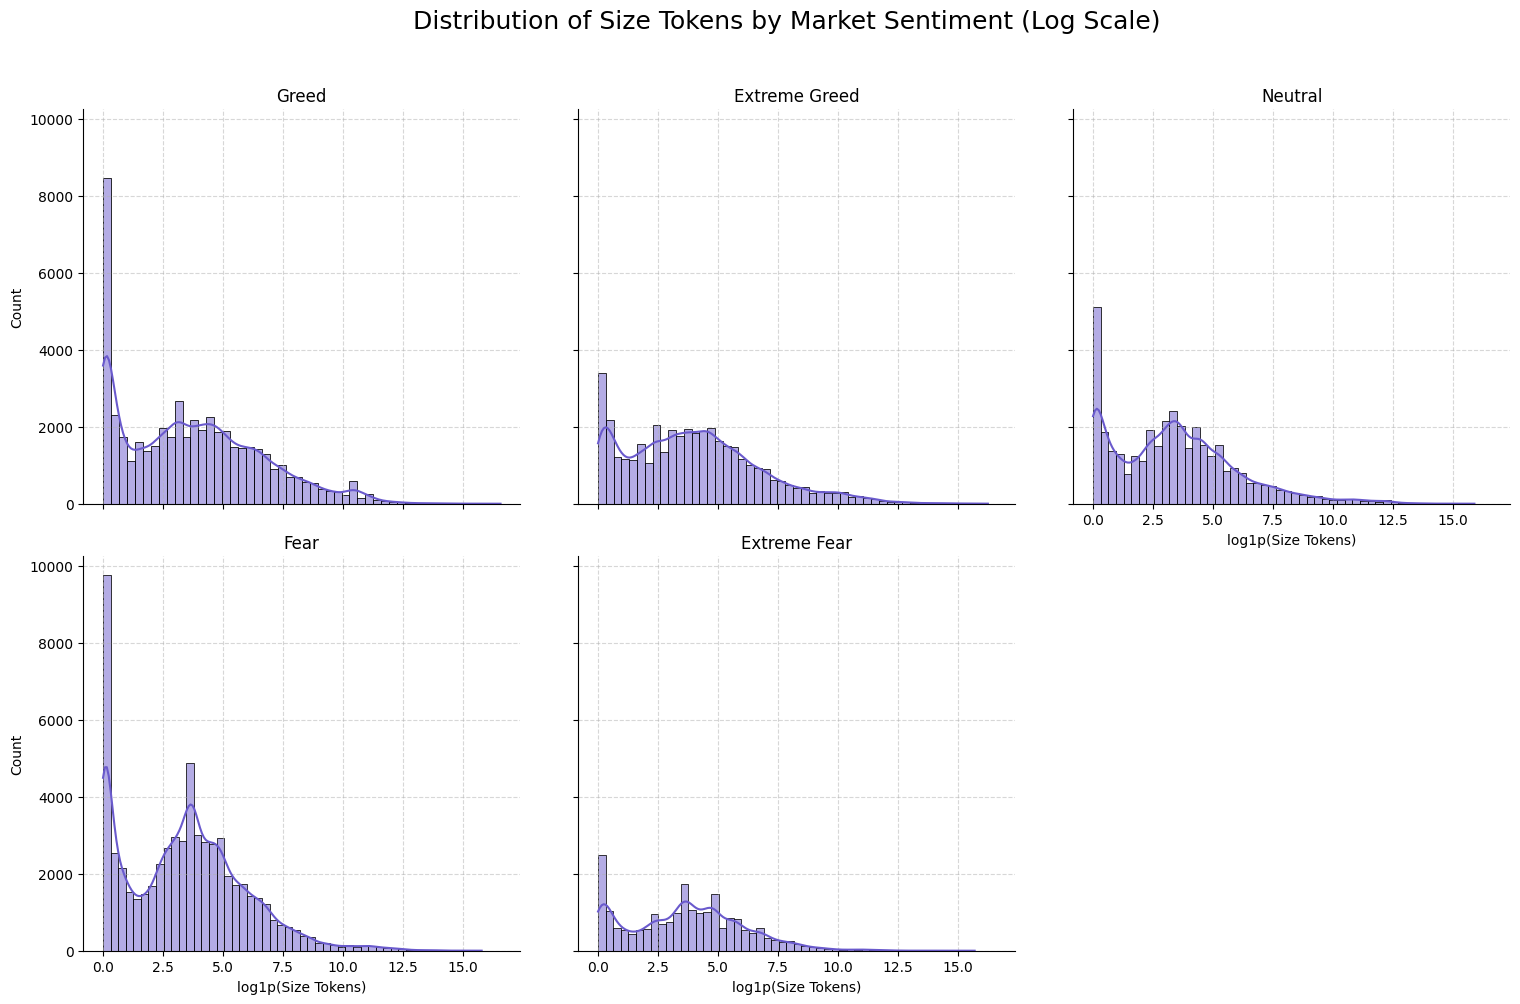

In [52]:
# Log-transform the Size Tokens
df['SizeTokens_log'] = np.log1p(df['Size Tokens'])

# Define colors
palette_hist = {
    'Extreme Greed': '#6A5ACD',
    'Greed': '#6A5ACD',
    'Neutral': '#6A5ACD',
    'Fear': '#6A5ACD',
    'Extreme Fear': '#6A5ACD'
}

# Create FacetGrid
g = sns.FacetGrid(df, col="classification", col_wrap=3, height=5, sharex=True, sharey=True)

# Plot histogram and KDE separately for each sentiment
for ax, sentiment in zip(g.axes.flat, df['classification'].unique()):
    subset = df[df['classification'] == sentiment]
    sns.histplot(subset['SizeTokens_log'], bins=50, color=palette_hist[sentiment], ax=ax, kde=True)
    ax.set_title(sentiment, fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)

# Axis labels and overall title
g.set_axis_labels("log1p(Size Tokens)", "Count")
plt.subplots_adjust(top=0.88)
g.fig.suptitle("Distribution of Size Tokens by Market Sentiment (Log Scale)", fontsize=18)

plt.show()

| log1p value | Actual value |
|-------------|--------------|
| 2.5         | 11           |
| 5.0         | 147          |
| 7.5         | 1,808        |
| 10.0        | 22,025       |
| 12.5        | 268,337      |
| 15.0        | 3,269,016    |

### **How to read the chart**
- X-axis (log1p): compressed scale so both small and large trades can be compared.
- Y-axis (Count): how many trades fall in that size bin.
- Histogram bars: actual frequency.
- KDE curve: smoothed probability density estimate.
---
### **Shape**
- Distribution is very wide -> goes from extremely small trades (almost zero) up to millions of tokens -> log1p(Size Tokens) = 6
- Strong spike at very small values (near 0 log scale -> lots of micro trades).
---
### **Interpretation**
- Many traders transact tiny token amounts.
- But because tokens can have very different prices (cheap tokens vs expensive tokens), raw "token size" isn’t very informative.
---
### **Sentiment link**
- Across sentiments, the shape looks similar: heavy skew, small trades dominate, a few very large trades.
- Sentiment doesn’t drastically shift the distribution of token counts.
---
---

### **Data Preprocessing: Log Transformation**
- Data Transformation: Applied log1p transformation to Size USD
- Reason: Original USD values span multiple orders of magnitude (pennies to millions)
- log1p = log(1 + x) handles zero values better than standard log transformation
- This reveals the underlying distribution pattern that would be hidden in linear scale

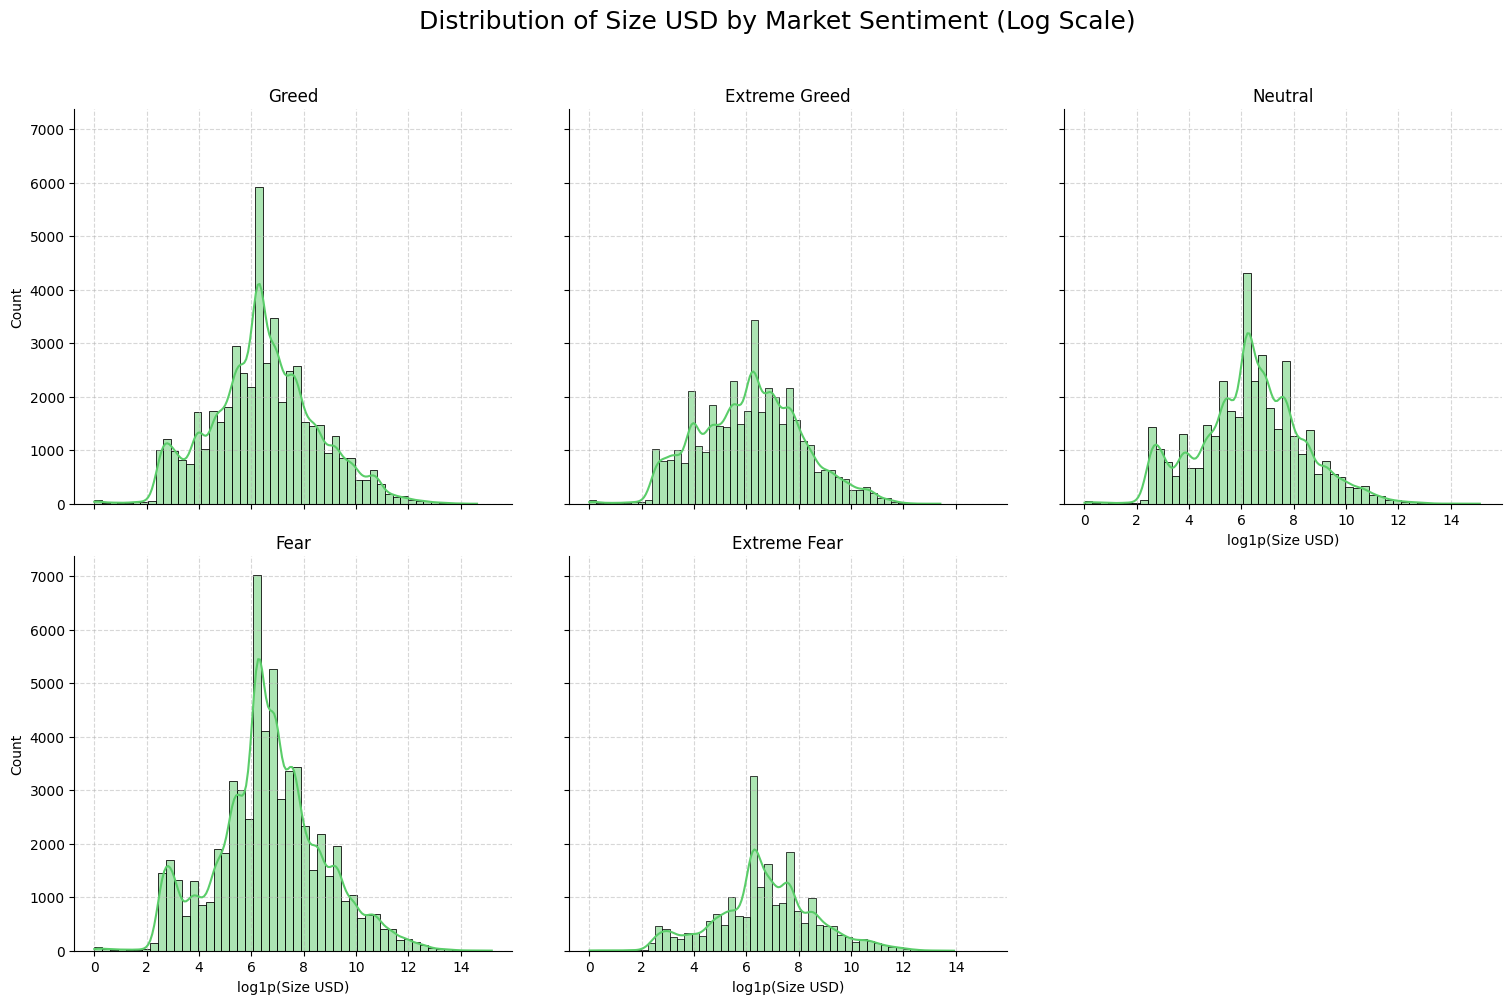

In [55]:
# Log-transform the Size Tokens
df['SizeUSD_log'] = np.log1p(df['Size USD'])

# Define colors
palette_hist = {
    'Extreme Greed': "#5ACD69",
    'Greed': "#5ACD69",
    'Neutral': "#5ACD69",
    'Fear': "#5ACD69",
    'Extreme Fear': "#5ACD69"
}

# Create FacetGrid
g = sns.FacetGrid(df, col="classification", col_wrap=3, height=5, sharex=True, sharey=True)

# Plot histogram and KDE separately for each sentiment
for ax, sentiment in zip(g.axes.flat, df['classification'].unique()):
    subset = df[df['classification'] == sentiment]
    sns.histplot(subset['SizeUSD_log'], bins=50, color=palette_hist[sentiment], ax=ax, kde=True)
    ax.set_title(sentiment, fontsize=12)
    ax.grid(True, linestyle='--', alpha=0.5)

# Axis labels and overall title
g.set_axis_labels("log1p(Size USD)", "Count")
plt.subplots_adjust(top=0.88)
g.fig.suptitle("Distribution of Size USD by Market Sentiment (Log Scale)", fontsize=18)

plt.show()

| log1p value | Actual value ($) |
|-------------|------------------|
| 2           | 6                |
| 4           | 54               |
| 6           | 403              |
| 8           | 2,981            |
| 10          | 22,026           |
| 12          | 162,754          |
| 14          | 1,202,604        |

### **How to read the chart**
- X-axis (log1p): compressed scale so both small and large trades can be compared. 
- Y-axis (Count): how many trades fall in that size bin.                           
- Histogram bars: actual frequency.                                                
- KDE curve: smoothed probability density estimate.                                
---
### **Shape**
- Much more bell-shaped / normal-like (after log transform).
- Clear concentration around log1p(Size USD) ~ 6–8 -> which corresponds to trades around $400–$3,000.
- Tails extend out to very large trade values ($millions), but rare.
---
### **Interpretation**
- Traders, regardless of sentiment, tend to cluster trades within a common $-value band.
- This makes sense because traders usually think in USD risk per trade, not token counts.
---
### **Sentiment link**
- The overall structure is similar across sentiment categories.
- Fear/Greed -> sharper peaks, similar spread
- Extreme Greed/Neutral -> moderate trades
- Extreme Fear -> less trades
---
---

## **# Direction vs Sentiment**

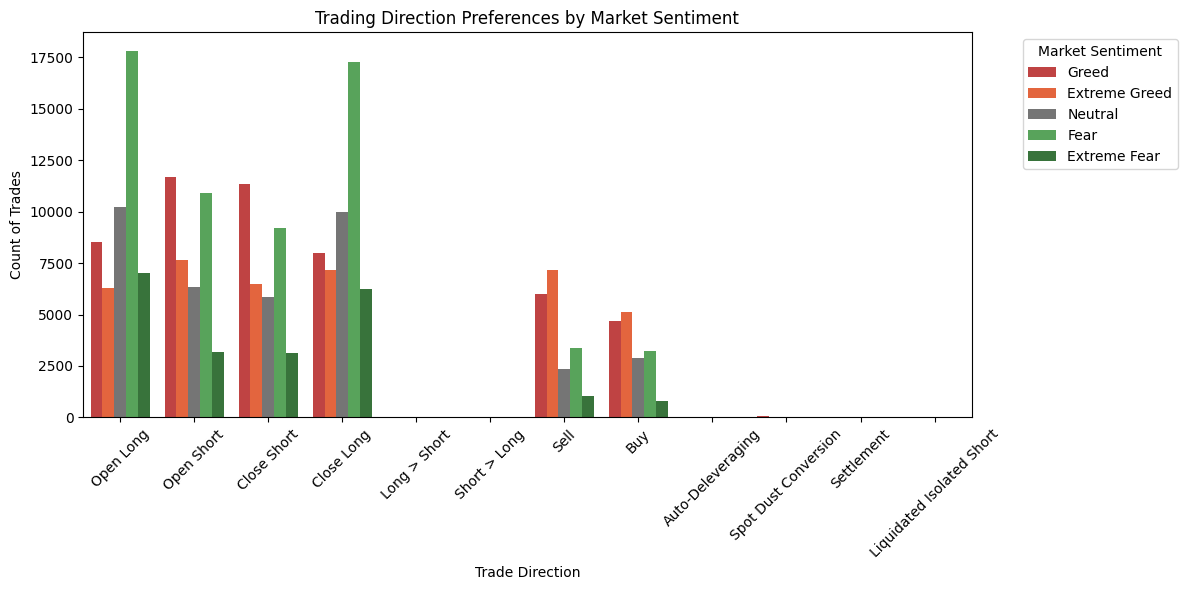

In [59]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Direction', hue='classification', 
              palette=['#d32f2f', '#ff5722', '#757575', '#4caf50', '#2e7d32'])
plt.title('Trading Direction Preferences by Market Sentiment')
plt.xlabel('Trade Direction')
plt.ylabel('Count of Trades')
plt.xticks(rotation=45)
plt.legend(title='Market Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

### **Volume-Activity-Sentiment**
- Fear drives high volume in Open Long and Close Long, which suggests there is high buying when traders are fearful, trying to catch the market bottoms as well as traders are rushing to exit their long positions due to fear of further losses
- Greed drives high volume in Open Short and Close Short which simply refers to traders’ desire for profit. When price looks overvalued, greedy traders short in large numbers -> high open short volume. When price falls enough and shorts want to lock profits, they close (buy back) -> high close short volume.
- Extreme Greed results in volume count between 5000 and 7500 across all directions.
- Traders Buy and Sell mostly out of Greed.
---

Text(120.7222222222222, 0.5, 'Trade Direction')

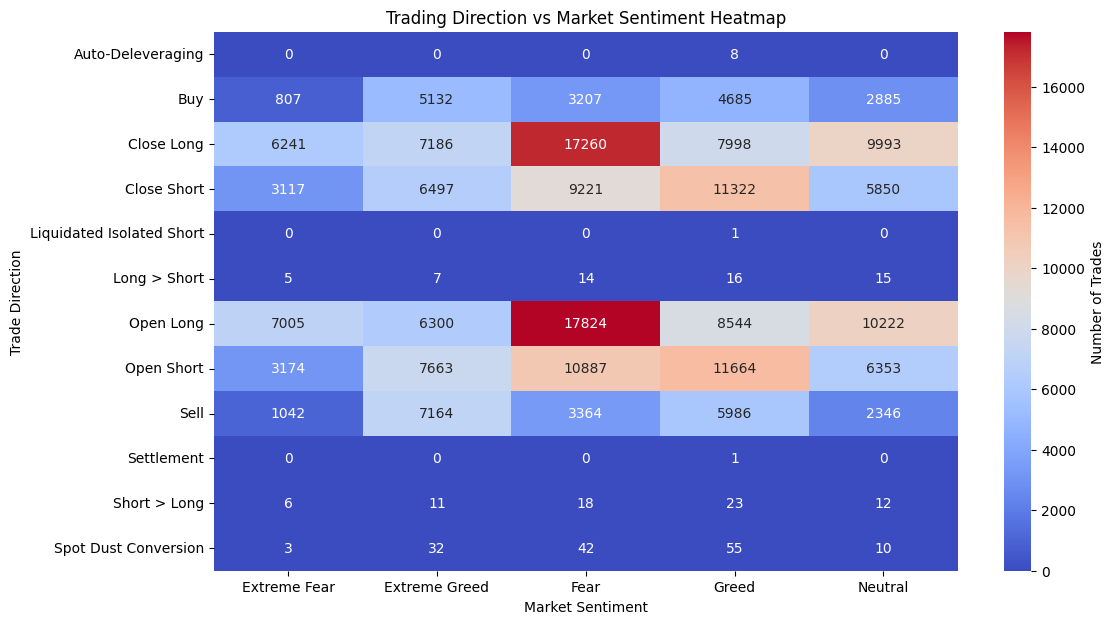

In [64]:
# Create cross-tabulation
direction_sentiment = pd.crosstab(df['Direction'], df['classification'])

plt.figure(figsize=(12, 7))
sns.heatmap(direction_sentiment, annot=True, fmt='d', cmap="coolwarm",
            cbar_kws={'label': 'Number of Trades'})
plt.title('Trading Direction vs Market Sentiment Heatmap')
plt.xlabel('Market Sentiment')
plt.ylabel('Trade Direction')

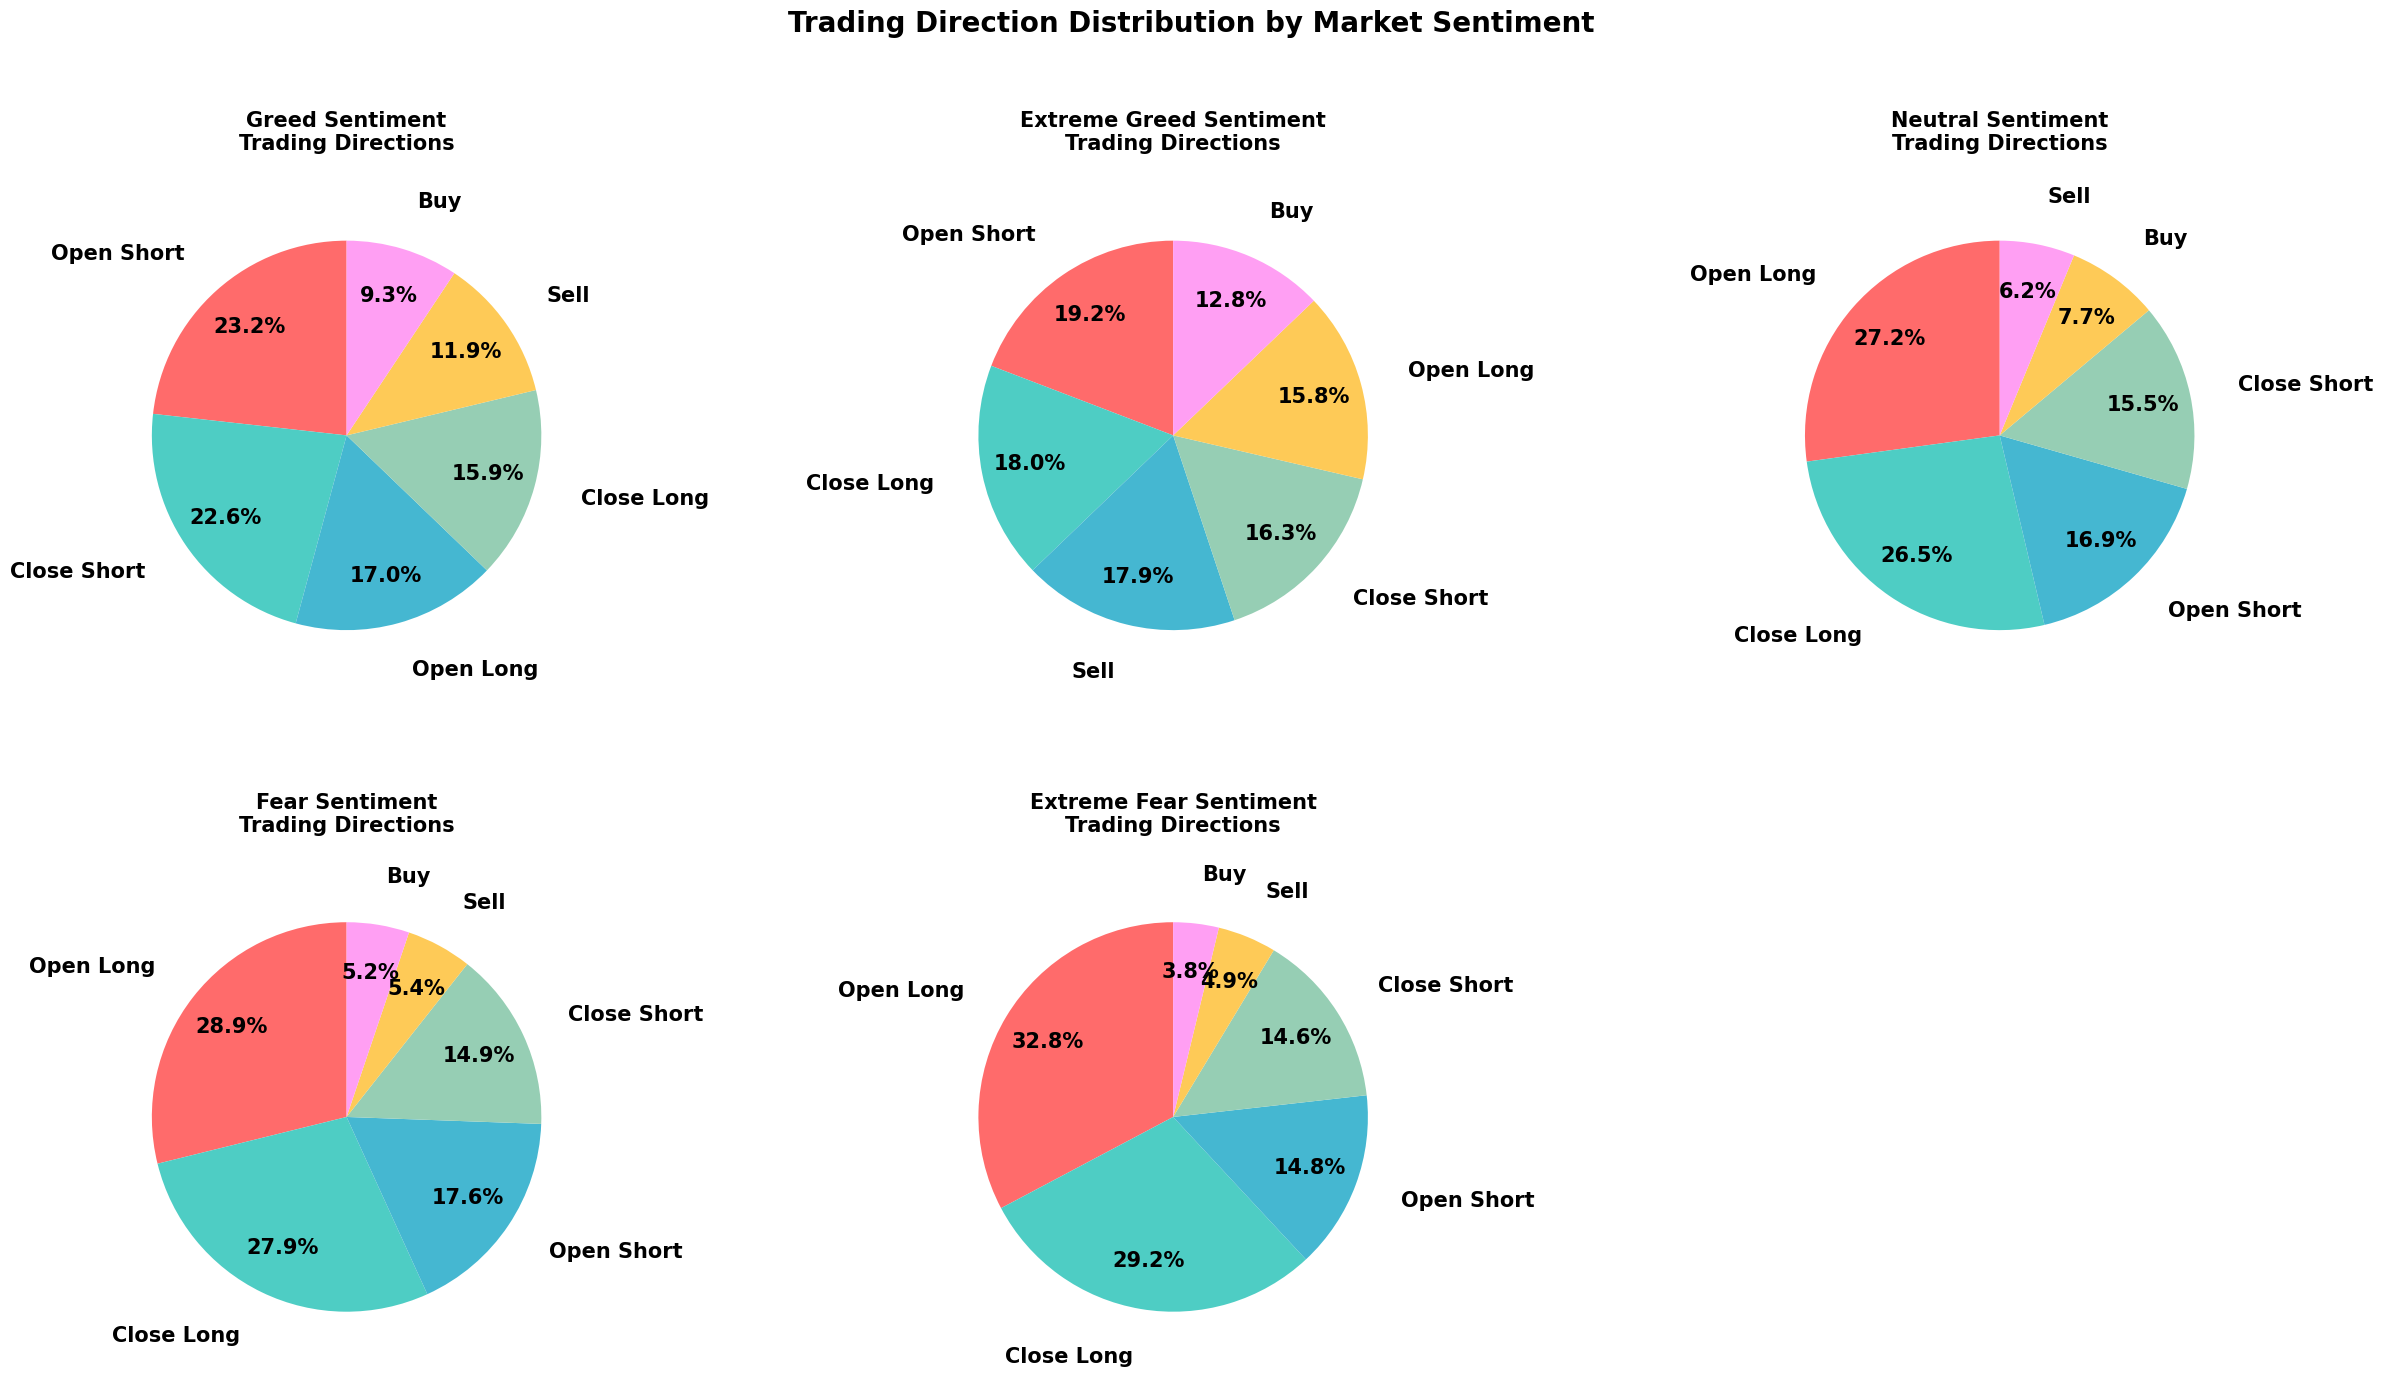

In [75]:
# Define the specific directions you want to analyze
target_directions = ['Open Long', 'Open Short', 'Close Long', 'Close Short', 'Sell', 'Buy']

# Filter dataset to only include these directions
df_filtered = df[df['Direction'].isin(target_directions)]

# Get unique sentiments
sentiments = df_filtered['classification'].unique()

# Create subplots with better spacing
fig, axes = plt.subplots(2, 3, figsize=(24, 14))
axes = axes.flatten()

# Direction colors
direction_colors = ['#ff6b6b', '#4ecdc4', '#45b7d1', '#96ceb4', '#feca57', '#ff9ff3']

for i, sentiment in enumerate(sentiments):
    # Filter data for each sentiment (only target directions)
    sentiment_data = df_filtered[df_filtered['classification'] == sentiment]
    direction_counts = sentiment_data['Direction'].value_counts()
    
    # Create pie chart with improved positioning
    wedges, texts, autotexts = axes[i].pie(
        direction_counts.values, 
        labels=direction_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=direction_colors[:len(direction_counts)],
        pctdistance=0.75,  # Move percentages closer to center
        labeldistance=1.25,  # Push labels further out to avoid overlap
        textprops={'fontsize': 11, 'fontweight': 'bold'}
    )
    
    # Style the percentage text - BLACK instead of white
    for autotext in autotexts:
        autotext.set_color('black')  # Changed to black
        autotext.set_fontweight('bold')
        autotext.set_fontsize(15)
    
    # Style the labels
    for text in texts:
        text.set_fontsize(15)
        text.set_fontweight('bold')
        text.set_color('black')
    
    axes[i].set_title(f'{sentiment} Sentiment\nTrading Directions', 
                      fontsize=15, fontweight='bold', pad=30)

# Hide extra subplots
for j in range(len(sentiments), 6):
    axes[j].axis('off')

# Adjust spacing between subplots
plt.tight_layout()
plt.subplots_adjust(top=0.85, hspace=0.4, wspace=0.5)  # Increased spacing
plt.suptitle('Trading Direction Distribution by Market Sentiment', 
             fontsize=20, fontweight='bold')
plt.show()

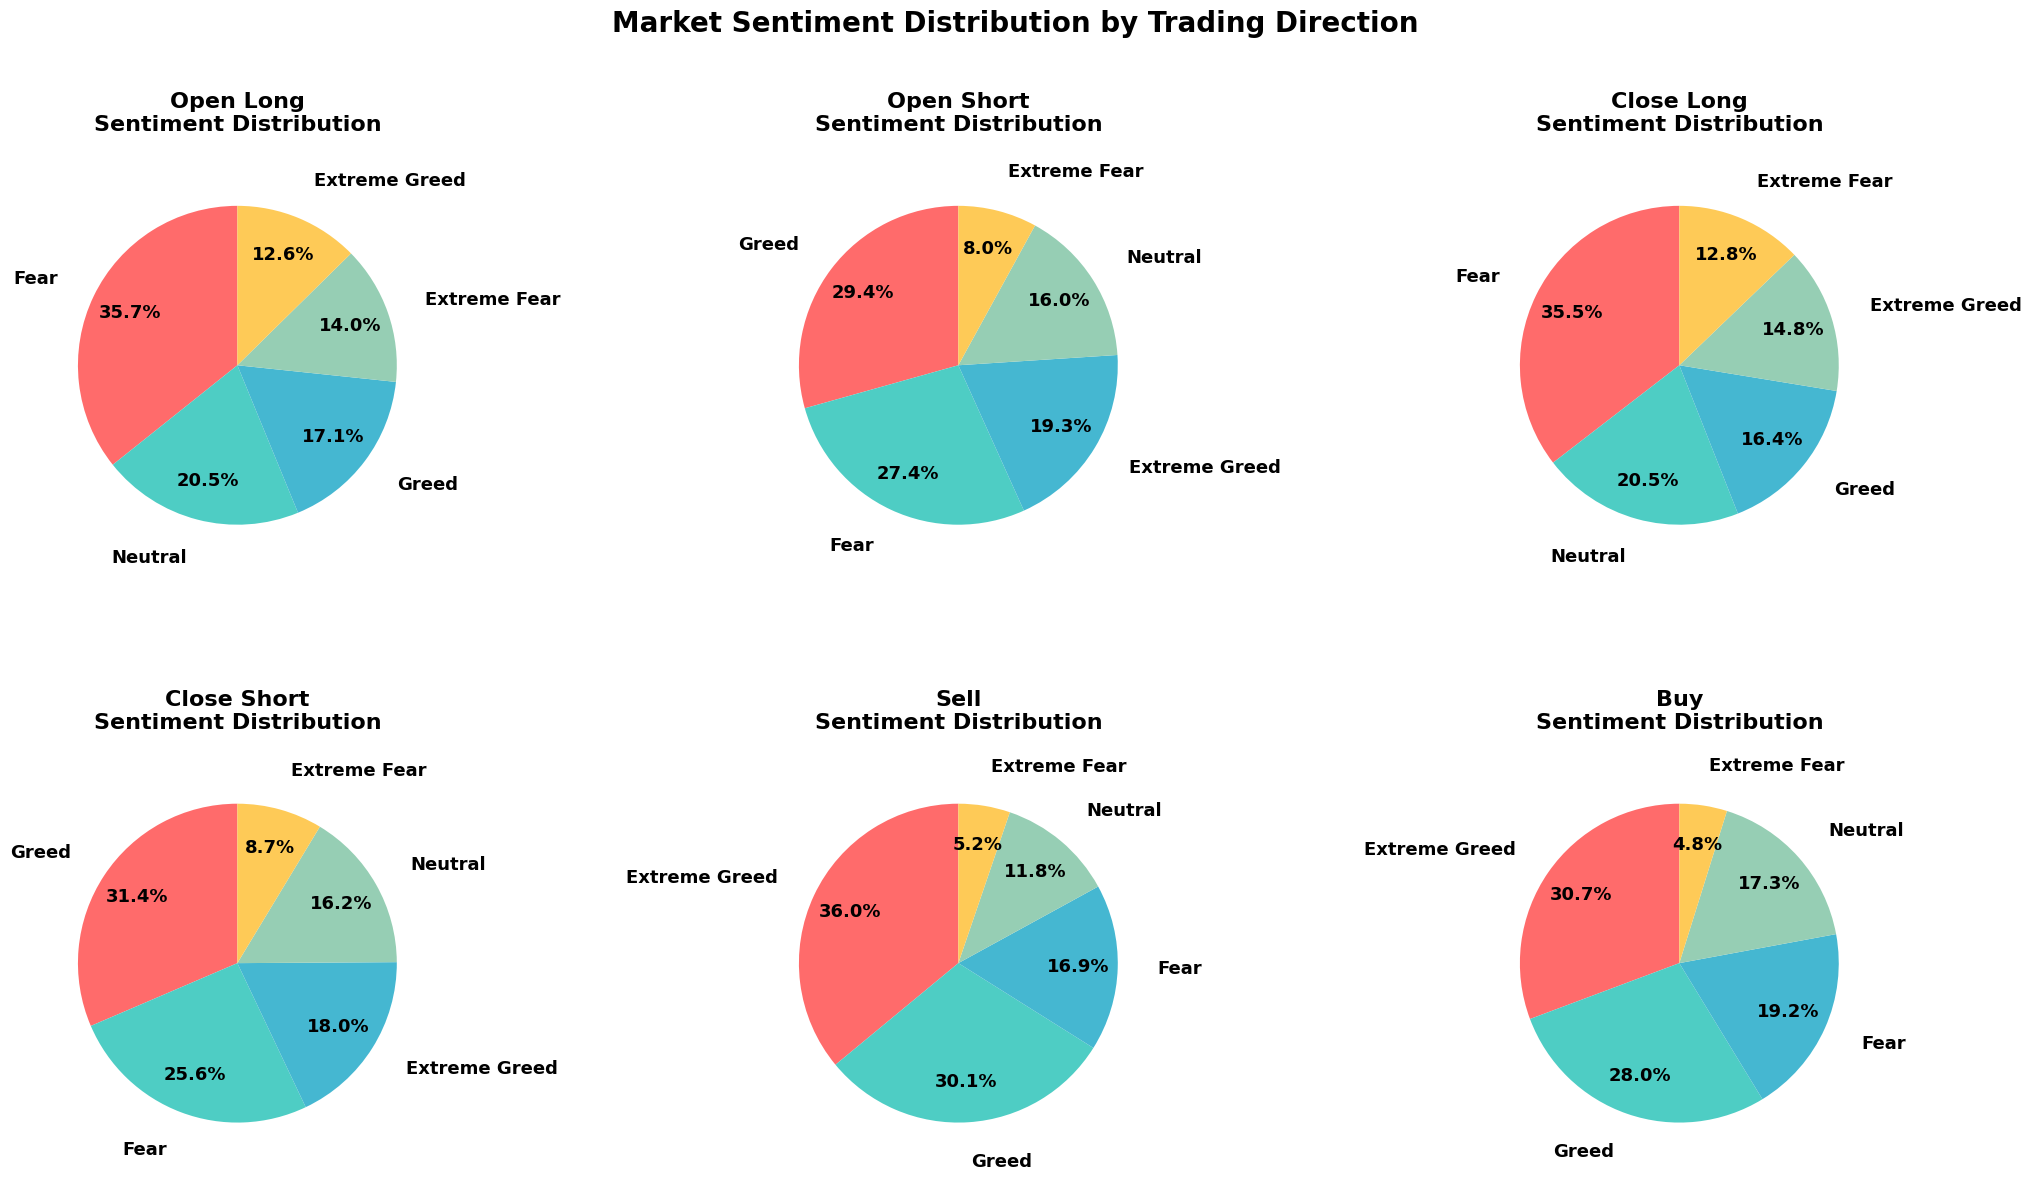

In [77]:
import math

# Define the specific directions you want to analyze
target_directions = ['Open Long', 'Open Short', 'Close Long', 'Close Short', 'Sell', 'Buy']

# Filter dataset to only include these directions
df_filtered = df[df['Direction'].isin(target_directions)]

# Get unique directions
directions = target_directions

# Dynamically set grid size
n = len(directions)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(7 * cols, 6 * rows))
axes = axes.flatten()

# Sentiment colors (pick enough for your unique sentiments)
sentiment_colors = ['#ff6b6b', '#4ecdc4', '#45b7d1', '#96ceb4', '#feca57', '#ff9ff3', '#c8d6e5']

for i, direction in enumerate(directions):
    # Filter data for each direction
    direction_data = df_filtered[df_filtered['Direction'] == direction]
    sentiment_counts = direction_data['classification'].value_counts()
    
    # Create pie chart
    wedges, texts, autotexts = axes[i].pie(
        sentiment_counts.values,
        labels=sentiment_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=sentiment_colors[:len(sentiment_counts)],
        pctdistance=0.75,
        labeldistance=1.25,
        textprops={'fontsize': 11, 'fontweight': 'bold'}
    )
    
    # Style percentages
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(13)
    
    # Style labels
    for text in texts:
        text.set_fontsize(13)
        text.set_fontweight('bold')
        text.set_color('black')
    
    axes[i].set_title(f'{direction}\nSentiment Distribution',
                      fontsize=16, fontweight='bold', pad=25)

# Hide unused subplots
for j in range(len(directions), len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.85, hspace=0.5, wspace=0.4)
plt.suptitle('Market Sentiment Distribution by Trading Direction',
             fontsize=20, fontweight='bold')
plt.show()

---
---

## **# Coin vs Sentiment**

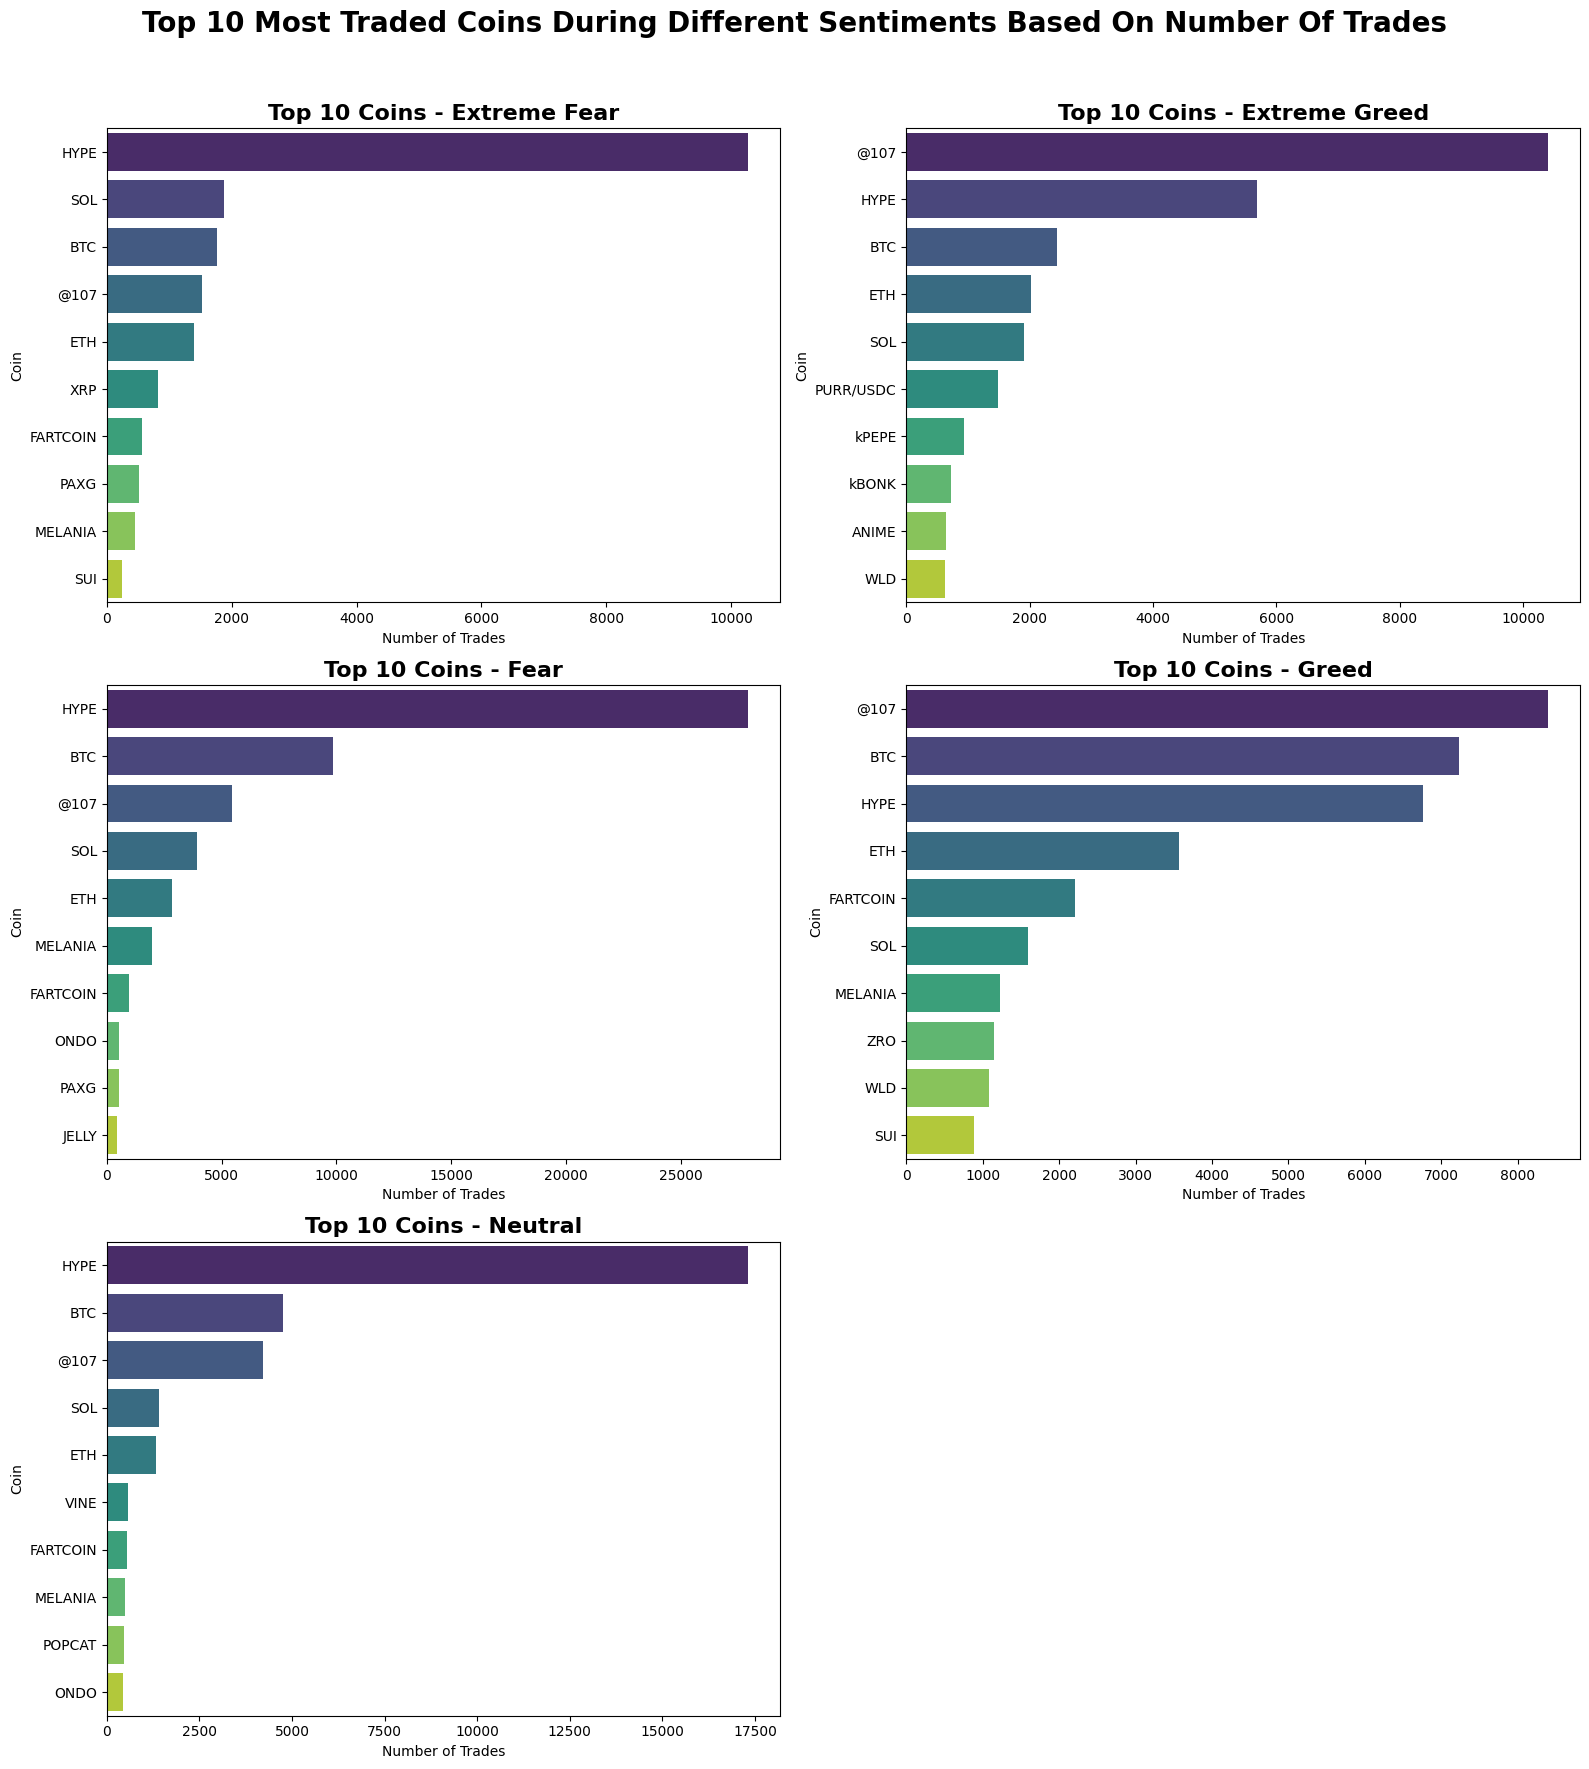

In [87]:
# Aggregate by count of occurrences (popularity = number of trades)
coin_volume = df.groupby(['classification', 'Coin']).size().reset_index(name='trade_count')

# Get unique sentiments
sentiments = coin_volume['classification'].unique()
n = len(sentiments)

# Create subplots dynamically
cols = 2
rows = (n + 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(16, 6 * rows), sharex=False)

if n == 1:
    axes = [axes]
else:
    axes = axes.flatten()

for i, sentiment in enumerate(sentiments):
    # Top 10 coins for each sentiment (based on trade_count)
    top_coins = coin_volume[coin_volume['classification'] == sentiment].nlargest(10, 'trade_count')
    
    sns.barplot(data=top_coins, x='trade_count', y='Coin', hue='Coin', legend=False, ax=axes[i], palette="viridis")
    axes[i].set_title(f"Top 10 Coins - {sentiment}", fontsize=16, fontweight='bold')
    axes[i].set_xlabel("Number of Trades")
    axes[i].set_ylabel("Coin")

# Hide unused axes if any
for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.suptitle("Top 10 Most Traded Coins During Different Sentiments Based On Number Of Trades", fontsize=20, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### **Insights**
- The above chart shows the top 10 coins based on the number of times they were traded.
- HYPE, BTC, @107, ETH and SOL are always in the Top 4-5.
---

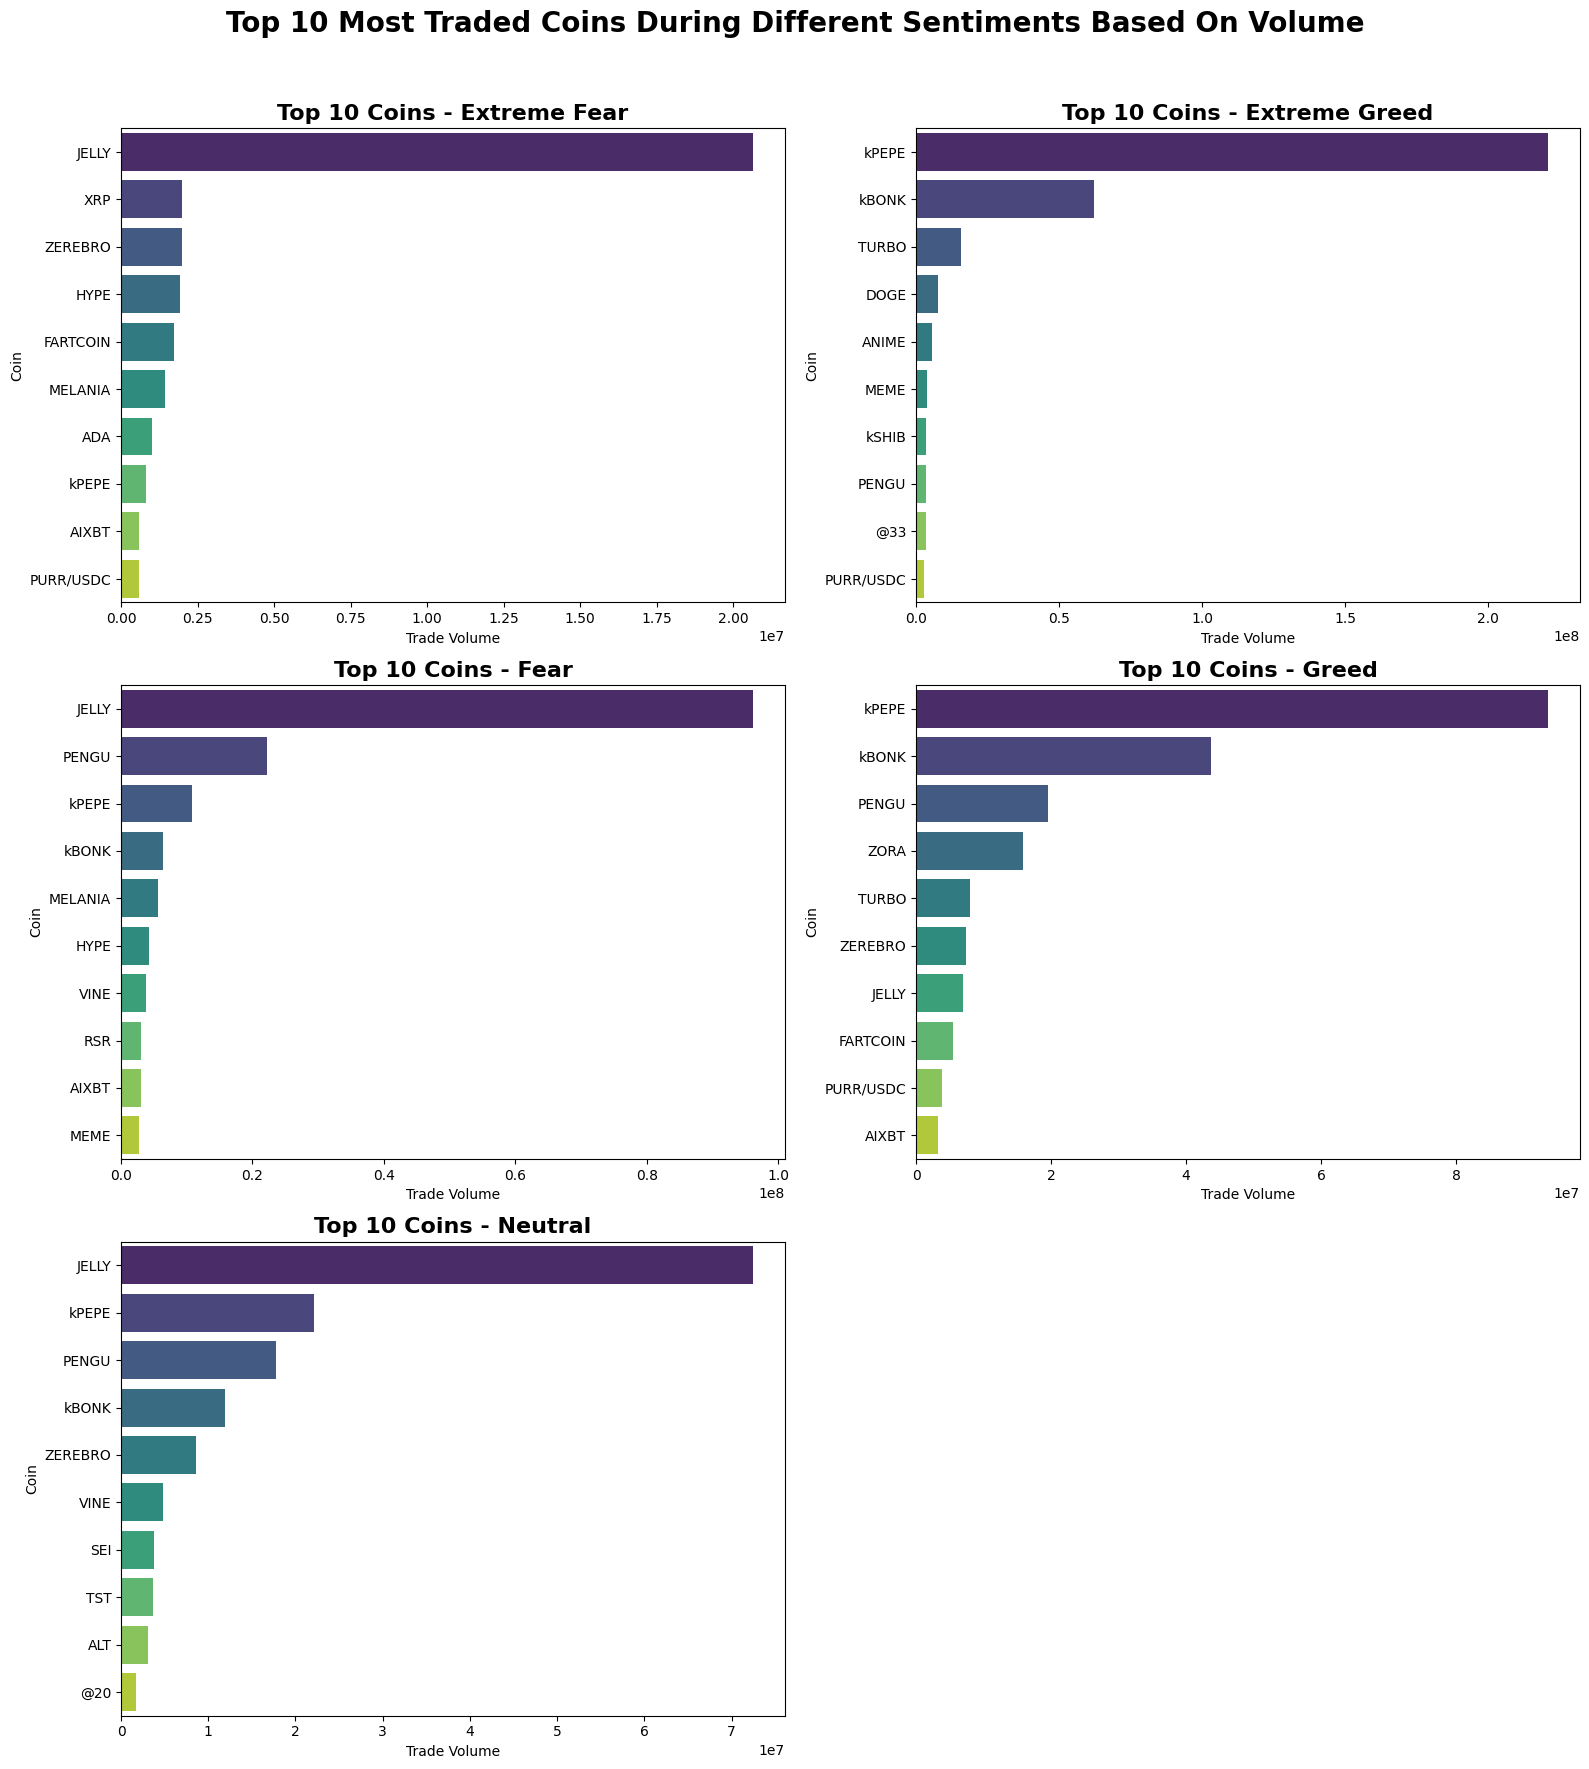

In [86]:
# Aggregate by coin + sentiment
coin_volume = df.groupby(['classification', 'Coin'])['Size Tokens'].sum().reset_index()

# Get unique sentiments
sentiments = coin_volume['classification'].unique()
n = len(sentiments)

# Create subplots dynamically
cols = 2
rows = (n + 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(16, 6 * rows), sharex=False)

if n == 1:
    axes = [axes]
else:
    axes = axes.flatten()

for i, sentiment in enumerate(sentiments):
    # Top 10 coins for each sentiment
    top_coins = coin_volume[coin_volume['classification'] == sentiment].nlargest(10, 'Size Tokens')
    
    sns.barplot(data=top_coins, x='Size Tokens', y='Coin', hue='Coin', legend=False, ax=axes[i], palette="viridis")
    axes[i].set_title(f"Top 10 Coins - {sentiment}", fontsize=16, fontweight='bold')
    axes[i].set_xlabel("Trade Volume")
    axes[i].set_ylabel("Coin")

# Hide unused axes if any
for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.suptitle("Top 10 Most Traded Coins During Different Sentiments Based On Volume", fontsize=20, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### **Insights**
- The above charts show the top 10 coins based on the volume in which they were traded.
- JELLY, kPEPE, PENGU, HYPE, FARTCOIN, MELANIA, ZEREBRO and kBONK were traded in high volumes during fearful and neutral market sentiment.
- kPEPE, kBONK, Turbo, ZEREBRO, PENGU and ZORA were traded in high volumes in greedy market sentiment.
- In the whole dataset, JELLY and kPEPE have the highest total volumes considering all market sentiments.
---
---

## **# Sentiment Trend vs Trader Profit Trend**

### **Data Preprocessing: Smoothing Closed PnL and Sentiment scores**
- Extract date component to aggregate daily trading data
- Calculate daily averages for both P&L and sentiment values
- Apply 3-day rolling average smoothing to reduce noise and show trends
- Merge datasets on date to enable correlation analysis

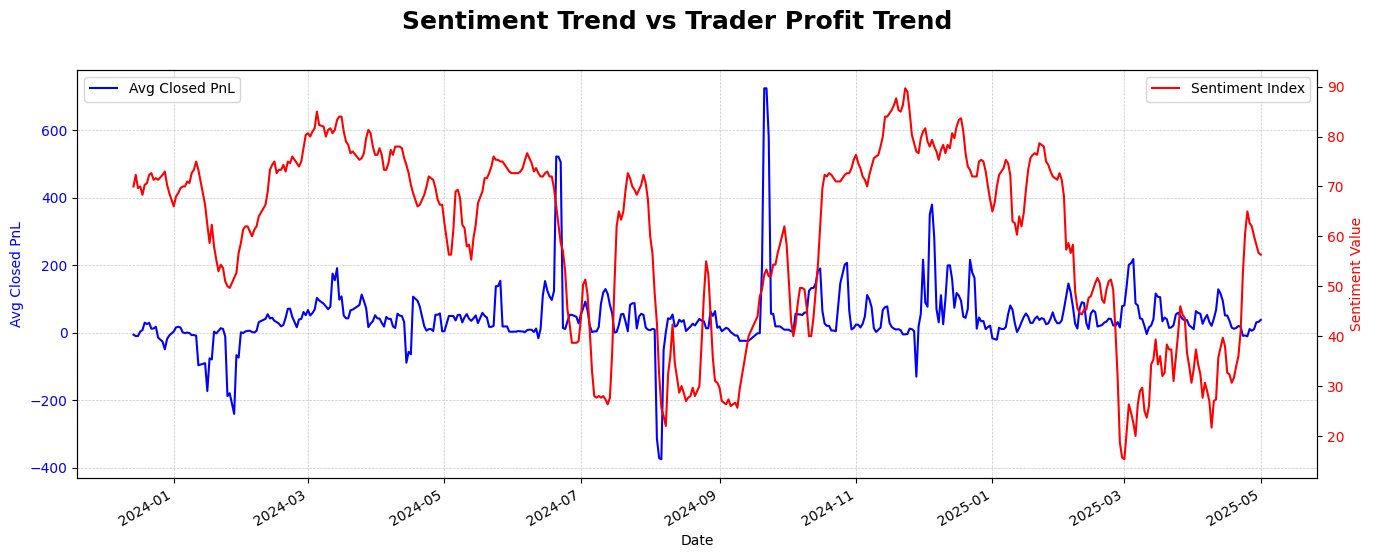

In [91]:
# Ensure Timestamp is datetime
df['Timestamp IST'] = pd.to_datetime(df['Timestamp IST'])

# Extract date
df['date'] = df['Timestamp IST'].dt.date

# Daily average Closed PnL
daily_pnl = df.groupby('date')['Closed PnL'].mean().reset_index(name='avg_pnl')

# Daily average sentiment value
daily_sentiment = df.groupby('date')['value'].mean().reset_index(name='avg_sentiment')

# Merge both into one DataFrame
daily_data = pd.merge(daily_pnl, daily_sentiment, on='date')

daily_data['avg_pnl_smooth'] = daily_data['avg_pnl'].rolling(3).mean()
daily_data['avg_sentiment_smooth'] = daily_data['avg_sentiment'].rolling(3).mean()

fig, ax1 = plt.subplots(figsize=(16,6))

# Plot average PnL
ax1.plot(daily_data['date'], daily_data['avg_pnl_smooth'], color='blue', label='Avg Closed PnL')
ax1.set_xlabel('Date')
ax1.set_ylabel('Avg Closed PnL', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Add grid
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Create second y-axis for sentiment
ax2 = ax1.twinx()
ax2.plot(daily_data['date'], daily_data['avg_sentiment_smooth'], color='red', label='Sentiment Index')
ax2.set_ylabel('Sentiment Value', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and legend
fig.suptitle('Sentiment Trend vs Trader Profit Trend', fontsize=18, fontweight='bold')
fig.autofmt_xdate()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

### **Insights**
- Inverse correlation: When sentiment is high (greed), trader profits tend to be lower or negative.
- Major profit spikes occur when sentiment drops to 20-40 range (fear territory).
- Significant losses happen when sentiment exceeds 60 (greed).
---
### **Key Patterns**
**2024 Early Year (Jan-Mar)**
- Rising sentiment (50 -> 85): Coincides with declining then negative average PnL
- Major losses (-200+ PnL)

**2024 Mid-Year (Apr-Jun)**
- Sentiment volatility: Wild swings between 50-80 create trading opportunities
- Profit spikes: Best performance occurs during sentiment dips to 40-60 range

**2024 Late Year (Jul-Oct)**
- Extreme Loss: Major losses (-300+ PnL) during sentiment dips to 20-40 range
- Extreme success: Massive profit spike (+600 PnL) during sentiment 40-50 range.

**Nov 2024 - Feb 2025**
- Sentiment ranges from 40-90 showing greedy market situation
- Majority of profitable trades with highest ~ +400 and lowest ~ -150 PnL

**Mar 2025 - May 2025**
- Sentiment volatility: Wild swings between 5-65 create trading opportunities
- Majority of profitable trades with zero or no negative PnL.
---
---

## **# Account-Level Performance by Sentiment**

### **We aggregate PnL per account under different sentiment conditions.**

In [93]:
account_sentiment_pnl = (
    df.groupby(['Account', 'classification'])['Closed PnL']
      .mean()
      .reset_index()
)
account_sentiment_pnl.head(10)

,Account,classification,Closed PnL
0,0x083384f897ee0f19899168e3b1bec365f52a9012,Extreme Fear,1247.692214
1,0x083384f897ee0f19899168e3b1bec365f52a9012,Extreme Greed,-42.626810
2,0x083384f897ee0f19899168e3b1bec365f52a9012,Fear,626.194346
3,0x083384f897ee0f19899168e3b1bec365f52a9012,Greed,482.089321
4,0x083384f897ee0f19899168e3b1bec365f52a9012,Neutral,298.456334
5,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Extreme Fear,-24.912665
6,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Extreme Greed,43.222903
7,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Fear,-0.632623
8,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Greed,10.211823
9,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Neutral,-16.573722


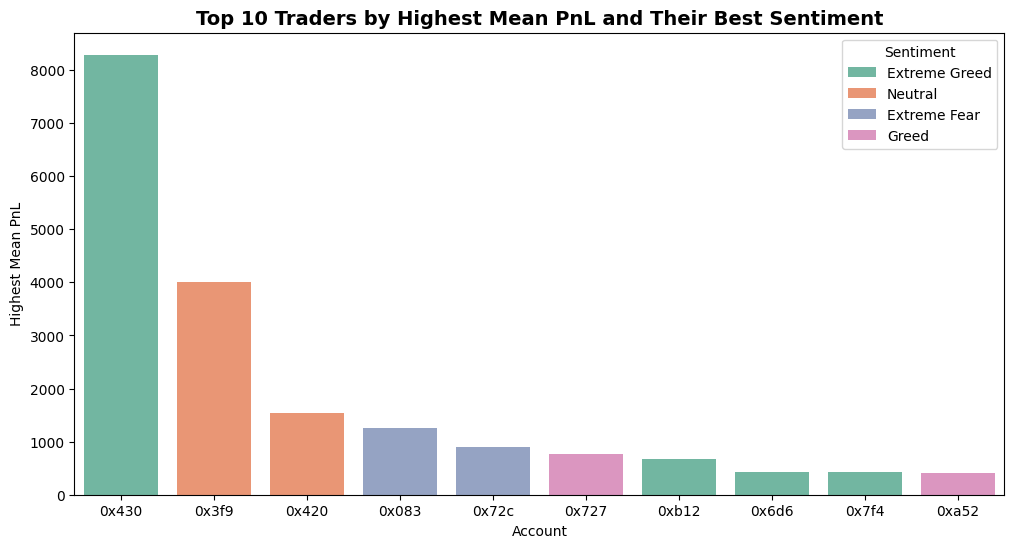

In [99]:
best_performance = (
    account_sentiment_pnl.loc[account_sentiment_pnl.groupby('Account')['Closed PnL'].idxmax()]
)

top10 = best_performance.nlargest(10, 'Closed PnL')
top10['Account_short'] = top10['Account'].astype(str).str[:5]

plt.figure(figsize=(12,6))
sns.barplot(
    data=top10, 
    x='Account_short', 
    y='Closed PnL', 
    hue='classification', 
    dodge=False,  # sentiment directly mapped to color
    palette='Set2'
)

plt.title("Top 10 Traders by Highest Mean PnL and Their Best Sentiment", fontsize=14, fontweight='bold')
plt.ylabel("Highest Mean PnL")
plt.xlabel("Account")
plt.legend(title="Sentiment")
plt.show()

---
---

## **# Size USD vs Sentiment**

### **We take the average and median trade size for each sentiment classification.**

In [102]:
trade_size_by_sentiment = (
    df.groupby('classification')['Size USD']
      .agg(['mean','median'])
      .reset_index()
)
trade_size_by_sentiment

,classification,mean,median
0,Extreme Fear,5349.731843,766.150
1,Extreme Greed,3112.251565,500.050
2,Fear,7816.109931,735.960
3,Greed,5736.884375,555.000
4,Neutral,4782.732661,547.655


### **Insights**
- Mean Trade Size (USD): Fear > Greed > Extreme Fear > Neutral > Extreme Greed
- Median Trade Size (USD): Almost the same for all sentiments.
---

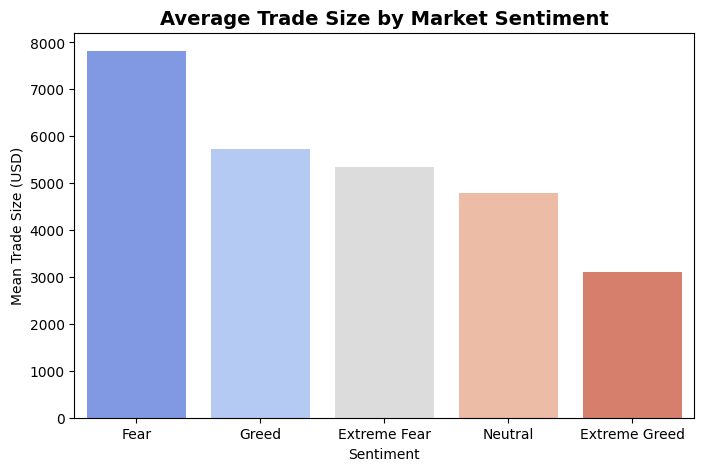

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

trade_size_sorted = trade_size_by_sentiment.sort_values('mean', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(
    data=trade_size_sorted, 
    x='classification', 
    y='mean', 
    hue='classification',
    legend=False,
    palette='coolwarm'
)

plt.title("Average Trade Size by Market Sentiment", fontsize=14, fontweight='bold')
plt.ylabel("Mean Trade Size (USD)")
plt.xlabel("Sentiment")
plt.show()

### **Insights**
- Fear = Big trades (~$7,800 average)
- Greed = Small trades (~$3,200 average)
- Traders are using fear as a buying opportunity (hence bigger trades) and greed as a selling opportunity (hence smaller trades)
- The platform's users demonstrate professional trading behavior.
---
---

## **# Side vs Sentiment**

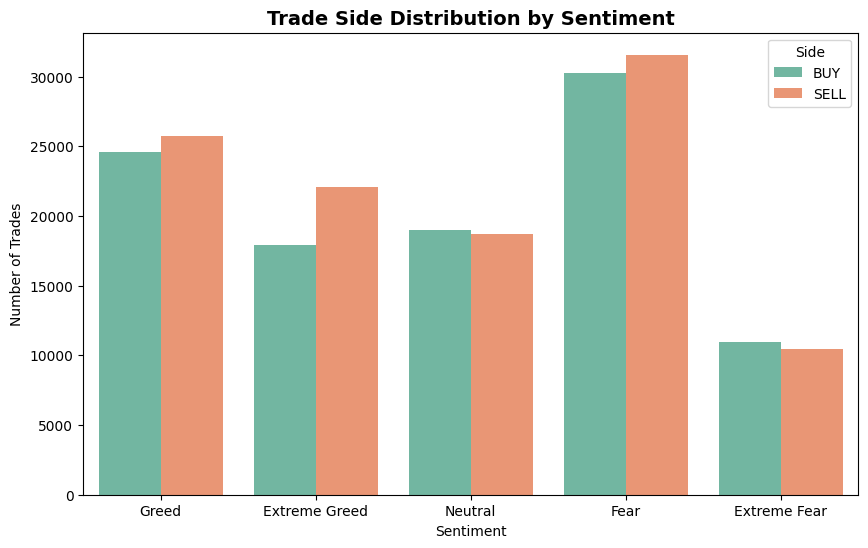

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(
    data=df,
    x='classification',   
    hue='Side',           
    palette='Set2'
)

plt.title("Trade Side Distribution by Sentiment", fontsize=14, fontweight='bold')
plt.xlabel("Sentiment")
plt.ylabel("Number of Trades")
plt.legend(title="Side")
plt.show()

### **Trading Activity Levels**
- Fear drives most trading: ~60,000 trades during fear periods (highest volume)
- Extreme fear drops activity: ~20,000 trades when market is extremely fearful
- Greed periods moderate: ~50,000 trades during regular greed
- Extreme greed reduces trading: Drops to ~40,000 trades
---
### **Buy vs Sell Balance**
- Buy and sell almost identical accross all sentiments.
---
### **Market Psychology Insights**
- People actively trading during scary times (panic + opportunity)
- Both extreme fear and greed reduce overall activity
---
---

## **# Correlation Matrix**

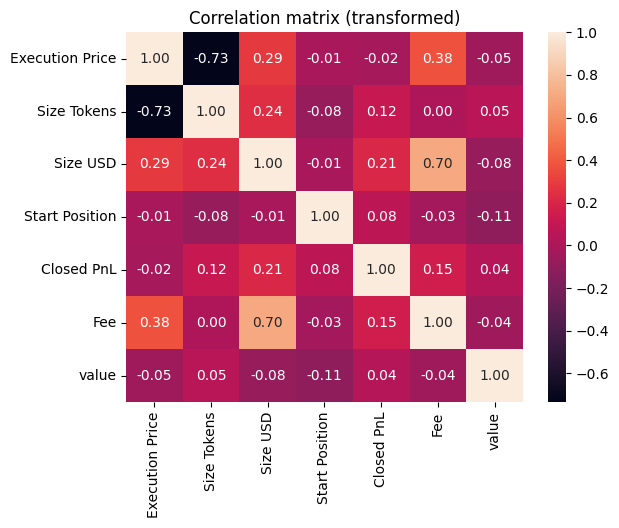

In [6]:
num = df[['Execution Price','Size Tokens','Size USD','Start Position','Closed PnL','Fee','value']].copy()
num = np.log1p(num.abs()) * np.sign(num)  # preserve sign but compress scale (careful)
sns.heatmap(num.corr(), annot=True, fmt=".2f")
plt.title('Correlation matrix (transformed)')
plt.show()

### **Insights**
**Strong Relationships**
- Execution Price <-> Size Tokens: Strong negative correlation (-0.73) - as token size increases, execution price decreases
- Size USD <-> Fee: Strong positive correlation (0.70) - larger USD transactions incur proportionally higher fees, indicating fee structure scales with transaction value

**Moderate Relationships**
- Execution Price <-> Fee: Moderate positive correlation (0.38) - higher execution prices associated with higher fees

**Weak Relationships**
- Execution Price <-> Size USD: Weak positive correlation (0.29) 
- Size Tokens <-> Size USD: Weak positive correlation (0.24) 
- Closed P&L <-> Size USD: Weak positive correlation (0.21) - slightly higher profits on larger USD trades
---